### Описание: существует немало приложений, при помощи которых можно узнать общие данные о своих музыкальных вкусах - любимый исполнитель, любимый трек и жанры. Однако на данный момент нет ресурсов, которые бы предоставляли детальный доступ к прослушиваниям треков на Яндекс.Музыке, поэтому я выбрал Spotify, который был доступен до марта 2022, чтобы узнать больше о треках, которые я лайкал с июля 2020.

Данные о треках были получены при помощи ресурса "Exportify" (https://exportify.net/)

In [782]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [783]:
sns.set_style('darkgrid')

### Изучение данных

In [784]:
df = pd.read_csv('liked.csv')
df.head()

,Track URI,Track Name,Artist URI(s),Artist Name(s),Album URI,Album Name,Album Artist URI(s),Album Artist Name(s),Album Release Date,Album Image URL,Disc Number,Track Number,Track Duration (ms),Track Preview URL,Explicit,Popularity,Added By,Added At
0,spotify:track:3VgQTiiOCA1vAajq8XHWdh,Love Me,spotify:artist:0VEzhZrWBCaoufAiZkjX3G,Marbert Rocel,spotify:album:49GVVdEnAKN1flSb0Tu4bE,Catch A Bird,spotify:artist:0VEzhZrWBCaoufAiZkjX3G,Marbert Rocel,2009-10-23,https://i.scdn.co/image/ab67616d0000b2738f9a73...,1,13,326973,https://p.scdn.co/mp3-preview/3431a40ca16b5c04...,False,41,NaN,2022-03-08T15:53:49Z
1,spotify:track:0ZzdUkZY5QDuH7vze5RkFT,Soul Shadows - Edit,"spotify:artist:3Bhgbs9kIwl8SuU0eIqN6b, spotify...","The Crusaders, Bill Withers",spotify:album:49oDv0OMQgI3bZvY5AshBQ,Gold,spotify:artist:3Bhgbs9kIwl8SuU0eIqN6b,The Crusaders,2007,https://i.scdn.co/image/ab67616d0000b273aa9581...,2,11,384346,NaN,False,27,NaN,2022-03-08T13:29:43Z
2,spotify:track:4t2OeILB07eMGTXSUbMPEu,Oxytocin,spotify:artist:6qqNVTkY8uBg9cP3Jd7DAH,Billie Eilish,spotify:album:0JGOiO34nwfUdDrD612dOp,Happier Than Ever,spotify:artist:6qqNVTkY8uBg9cP3Jd7DAH,Billie Eilish,2021-07-30,https://i.scdn.co/image/ab67616d0000b2732a038d...,1,5,210232,NaN,False,72,NaN,2022-03-07T15:38:05Z
3,spotify:track:559261quLx4Iuiz1PjmvgY,You Look Certain (I’m Not So Sure),"spotify:artist:3NUtpWpGDoffm3RCGhSHtl, spotify...","Mount Kimbie, Andrea Balency",spotify:album:54FblbvyHNrWeAuEJqnyit,Love What Survives,spotify:artist:3NUtpWpGDoffm3RCGhSHtl,Mount Kimbie,2017-09-08,https://i.scdn.co/image/ab67616d0000b273ef0e29...,1,6,202260,https://p.scdn.co/mp3-preview/eb0fda7df3139d22...,False,38,NaN,2022-03-07T15:17:45Z
4,spotify:track:1cjwmz8usNrrtkNCbzN2sS,Hello Like Before,spotify:artist:1ThoqLcyIYvZn7iWbj8fsj,Bill Withers,spotify:album:36qxAJDnXvbjD2UVAkawwZ,The Essential Bill Withers,spotify:artist:1ThoqLcyIYvZn7iWbj8fsj,Bill Withers,2013-08-20,https://i.scdn.co/image/ab67616d0000b273351dac...,2,3,329573,https://p.scdn.co/mp3-preview/3c3ed9e4ebf9c412...,False,37,NaN,2022-03-07T11:39:48Z


Описание данных:
- `Track URI` - уникальный URL трека, при открытии которого мы переходим на конкретный трек в Spotify
- `Track Name` - название трека
- `Artist URI(s)` - уникальный URL исполнителя
- `Artist Name(s)` - имена исполнителя(-ей) трека
- `Album Name` - название альбома/EP/сингла
- `Album Artist URI(s)` - уникальный URL альбома
- `Album Artist Name(s)` - имя исполнителя, выпустившего альбом
- `Album Release Date` - дата выхода альбома
- `Album Image URL` - URL обложки альбома
- `Disc Number` - номер стороны диска 
- `Track Number` - порядковый номер трека
- `Track Duration (ms)` - продолжительность трека в миллисекундах
- `Track Preview URL` - краткая версия трека для ознакомительного прослушивания
- `Explicit` - присутствие в треке ненормативной лексики (True - да, False - нет)
- `Popularity` - популярность трека (0-100)
- `Added By` - кем добавлен трек
- `Added At` - дата и время добавления 

In [785]:
df.shape[0] # Всего 1651 лайкнутый трек

1651

In [786]:
df.isna().sum() # Нет превью треков и кто добавил - позже оставим только необходимые колонки 

Track URI                  0
Track Name                 0
Artist URI(s)              0
Artist Name(s)             0
Album URI                  0
Album Name                 0
Album Artist URI(s)        0
Album Artist Name(s)       0
Album Release Date         0
Album Image URL            0
Disc Number                0
Track Number               0
Track Duration (ms)        0
Track Preview URL        520
Explicit                   0
Popularity                 0
Added By                1651
Added At                   0
dtype: int64

In [787]:
df.duplicated().sum() # Полных дубликатов нет 

0

In [788]:
df.info() # Нужно преобразовать даты и продолжительность трека в нужный формат

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1651 entries, 0 to 1650
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Track URI             1651 non-null   object 
 1   Track Name            1651 non-null   object 
 2   Artist URI(s)         1651 non-null   object 
 3   Artist Name(s)        1651 non-null   object 
 4   Album URI             1651 non-null   object 
 5   Album Name            1651 non-null   object 
 6   Album Artist URI(s)   1651 non-null   object 
 7   Album Artist Name(s)  1651 non-null   object 
 8   Album Release Date    1651 non-null   object 
 9   Album Image URL       1651 non-null   object 
 10  Disc Number           1651 non-null   int64  
 11  Track Number          1651 non-null   int64  
 12  Track Duration (ms)   1651 non-null   int64  
 13  Track Preview URL     1131 non-null   object 
 14  Explicit              1651 non-null   bool   
 15  Popularity           

In [789]:
df['Added At'] =  df['Added At'].str.replace("[TZ]", " ")
df['Added At'] = pd.to_datetime(df['Added At'])
df['Added At'] = df['Added At'] + pd.Timedelta(hours=5) # так как время в UTC, то добавляем 5 часов (пермское время)

df['Album Release Date'] = pd.to_datetime(df['Album Release Date'])

df['Track Duration (ms)'] = pd.to_datetime(df['Track Duration (ms)'], unit='ms').dt.strftime('%M:%S')
df['Track Duration (ms)']  = pd.to_timedelta('00:' + df['Track Duration (ms)'].replace('',np.NaN))

C:\Users\-002D~1\AppData\Local\Temp/ipykernel_10576/3770452706.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Added At'] =  df['Added At'].str.replace("[TZ]", " ")


In [790]:
df = df.rename(columns={'Track Duration (ms)': 'Track Duration'})

In [791]:
df = df[['Track Name', 'Artist Name(s)', 'Album Name', \
         'Album Artist Name(s)', 'Album Release Date', 'Track Duration', \
         'Explicit', 'Popularity', 'Added At']] 

# Оставим только те колонки, которые могут нам понадобиться

In [792]:
df['Added At'].max() - df['Added At'].min() # Данные за полтора года

Timedelta('599 days 20:47:15')

In [793]:
df.query('Popularity == 0').shape[0] # Почему-то у некоторых треков популярность = 0...

272

Что такое популярность трека?

<u>Такой ответ дают в API документации Spotify</u>:

*The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are.
Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past.*
<br></br>

<u>Также нашёл следующее</u>:

*Evidence seems to indicate that the Spotify Popularity score is a kind of aggregate metric. Most likely all of the following (in no particular order), and probably others.*

- TOTAL STREAMS
- AGE OF SONG
- LISTENER/SAVE RATIO
- STREAMS/LISTENER RATIO

### То есть, популярность высчитывается не только от кол-ва воспроизведений, но и от того, как давно этот трек проигрывался другими пользователями, годом выпуска и количеством сохранений.

In [794]:
df.query('Popularity == 0').head() 

# Есть треки как выпущенные как более 50 лет назад, так и в этом десятилетии.

,Track Name,Artist Name(s),Album Name,Album Artist Name(s),Album Release Date,Track Duration,Explicit,Popularity,Added At
6,Mother Culture,Avast,Mother Culture,Avast,2018-10-26,0 days 00:08:57,False,0,2022-03-07 12:15:31
15,Cross The Tracks (We Better Go Back),Maceo And The Macks,Funky Good Time: The Anthology,The J.B.'s,1995-01-01,0 days 00:03:19,False,0,2022-03-03 18:05:07
17,The Revolution Will Not Be Televised,Gil Scott-Heron,Pieces Of A Man,Gil Scott-Heron,1971-01-01,0 days 00:03:07,False,0,2022-03-03 16:32:06
48,My Rose by the Sea (Satyr Boy),King Dude,Full Virgo Moon,King Dude,2020-03-13,0 days 00:03:59,False,0,2022-02-22 21:15:51
89,White Room,Cream,Wheels Of Fire (Remastered),Cream,1968-07-01,0 days 00:05:03,False,0,2022-02-16 16:36:35


Эти треки должны быть также учтены при подсчёте средней популярности.

---
<font size="5">Мы ставим перед собой следующие задачи:

- определить самых популярных исполнителей
- составить распределение треков по годам
- найти среднюю продолжительность треков (+ min/max) и среднюю популярность треков плейлиста
- понять, в какой час и какой день недели я чаще всего добавлял треки</font>
---

### Самые популярные исполнители и альбомы

In [795]:
df['Album Artist Name(s)'].value_counts().head(10) # Что за "Разные исполнители"?

Разные исполнители     39
Гражданская Оборона    24
Khruangbin             14
Four Tet               14
Röyksopp               12
Tortoise               11
Антоха МС              10
Noize MC                9
Kraftwerk               8
Sigur Rós               8
Name: Album Artist Name(s), dtype: int64

In [796]:
df[df['Album Artist Name(s)'] == 'Разные исполнители'].head() # Лучше брать имя исполнителя трека, а не альбома

,Track Name,Artist Name(s),Album Name,Album Artist Name(s),Album Release Date,Track Duration,Explicit,Popularity,Added At
177,I Luv U,Dizzee Rascal,Pay Close Attention : XL Recordings,Разные исполнители,2014-08-25,0 days 00:04:04,True,0,2022-02-03 20:58:12
188,Теплопередача,MNRGORODCKIY,Сырой Сборник. Цвет Суеты,Разные исполнители,2021-11-26,0 days 00:03:04,False,0,2022-02-01 19:46:54
247,Limerence,Yves Tumor,Mono No Aware,Разные исполнители,2017-03-17,0 days 00:05:29,True,58,2022-01-23 17:48:27
346,Gotham Love,BAKGROUND,LT-GLOBE-XXX,Разные исполнители,2019-10-25,0 days 00:04:33,False,47,2022-01-03 21:32:54
357,Somnium,Robert Rich,Fahrenheit Project Part Two,Разные исполнители,2001-12-01,0 days 00:08:31,False,16,2022-01-01 14:31:49


In [797]:
df['Artist Name(s)'].value_counts().head(10) 

# Топ-5 тот же самый, но ниже появились Nirvana, Röyksopp, Bon Iver. 

Гражданская Оборона    24
Four Tet               12
Tortoise               11
Антоха МС               9
Noize MC                8
Nirvana                 8
Röyksopp                8
Khruangbin              8
Bon Iver                8
Kraftwerk               8
Name: Artist Name(s), dtype: int64

Но здесь надо учитывать, что если в треке несколько исполнителей, то они засчитываются отдельно.
Уберём колонку `Artist Name(s)`, чтобы работать непосредственно с исполнителями, от имени которых выходили альбомы/синглы и т.д.

In [798]:
df = df[['Track Name', 'Album Name', \
         'Artist Name(s)', 'Album Release Date', 'Track Duration', \
         'Explicit', 'Popularity', 'Added At']]

### Средняя популярность, средняя / максимальная / минимальная продолжительность.

In [799]:
df.Popularity.mean()

30.439733494851605

In [800]:
df['Track Duration'].min()

Timedelta('0 days 00:00:35')

In [801]:
df['Track Duration'].max() 

Timedelta('0 days 00:28:33')

Раз у нас такой есть такой длинный трек, то заодно посчитаем и медиану, чтобы результат был выше к действительному.

In [802]:
df['Track Duration'].mean()

Timedelta('0 days 00:04:43.333737129')

In [803]:
df['Track Duration'].median()

Timedelta('0 days 00:04:15')

### Распределение добавления треков по
- году их выпуска
- времени
- дню недели

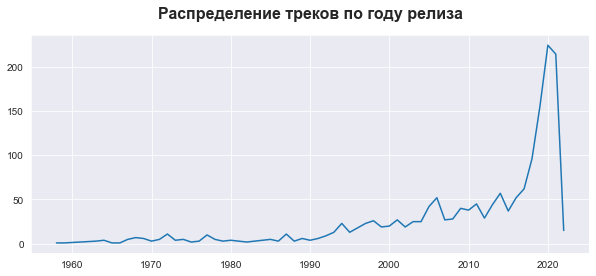

In [824]:
df['release_year'] = df['Album Release Date'].dt.year
release = df.groupby('release_year', as_index=False).agg({'Track Name': 'count'})

plt.figure(figsize=(10,4));
ax = sns.lineplot(data=release, x='release_year', y='Track Name');
ax.set(ylabel=None);
ax.set(xlabel=None);
plt.title("Распределение треков по году релиза", fontsize=16, fontweight='bold', y=1.05);

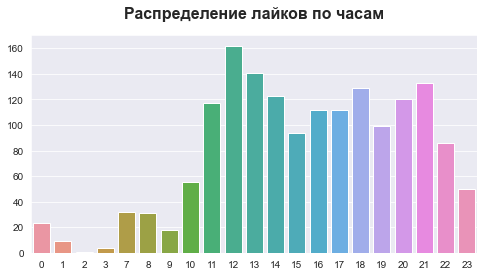

In [830]:
df['added_hour'] = df['Added At'].dt.hour 


plt.figure(figsize=(8,4))
ax = sns.countplot(data=df, x='added_hour')
ax.set(ylabel=None);
ax.set(xlabel=None);
#plt.xticks(ticks);
plt.title("Распределение лайков по часам", fontsize=16, fontweight='bold', y=1.05);

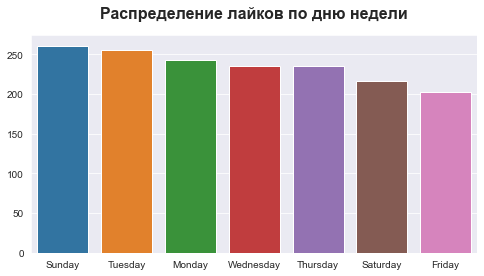

In [831]:
df['added_weekday'] = df['Added At'].dt.dayofweek
df['added_weekday'] = df['added_weekday'].replace({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', \
                                3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'})


large_to_small = df.groupby('added_weekday').size().sort_values().index[::-1]


plt.figure(figsize=(8,4))
ax = sns.countplot(data=df, x='added_weekday', order=large_to_small)
ax.set(ylabel=None);
ax.set(xlabel=None);
plt.title("Распределение лайков по дню недели", fontsize=16, fontweight='bold', y=1.05);

In [810]:
# df.to_csv('liked_tracks_prepared.csv', index=False) - для выгрузки очищенных данных

### Выводы:

- *Любимые исполнители*: Гражданская Оборона, Four Tet, Tortoise, Антоха МС, Noize MC, Nirvana, Röyksopp, Khruangbin, Bon Iver, Kraftwerk.
- *Средняя популярность трека* - 30/100, что довольно низко. Дело здесь НЕ в том, что большинство треков были выпущены давно, так как большая часть лайков приходится на XXI век. Видимо, имеет значение, как часто эти треки слушают другие пользователи.
- *Медианная продолжительность трека* - 4 минуты 15 секунд. 
- *Больше всего треков были добавлены в воскресенье*. Самый непопулярный день - пятница. Видимо, в конце рабочей недели не хочется искать свежую музыку :)
- В целом, *чем новее музыка, тем больше я её лайкаю*. Большинство треков приходится на 2019-2021 года. Думаю, сюда бы и вошёл 2022 год, но Spotify ушёл из России в марте. 
- *Cамое активное время добавления* - середина дня (12-13) и ранний вечер (20-21). Скорее всего, это объясняется перерывом на работе и отдыхом после приезда домой.

Визуализацию получившихся результатов в Tableau можно посмотреть по ссылке:

http://public.tableau.com/profile/api/publish/my_playlist_visualisation/spotify_liked